## Day 50 Lecture 2 Assignment

In this assignment, we will apply various methods of internal evaluation to the results of K-Means clustering on a dataset containing the results of a survey on financial wellbeing.

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [2]:
# answer goes here
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv')
df

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,FWB1_4,FWB1_5,FWB1_6,FWB2_1,FWB2_2,FWB2_3,FWB2_4,FSscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,FS1_7,FS2_1,FS2_2,FS2_3,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,PROPPLAN_1,PROPPLAN_2,PROPPLAN_3,PROPPLAN_4,MANAGE1_1,MANAGE1_2,MANAGE1_3,MANAGE1_4,...,SOCSEC2,SOCSEC3,LIFEEXPECT,HHEDUC,KIDS_NoChildren,KIDS_1,KIDS_2,KIDS_3,KIDS_4,EMPLOY,EMPLOY1_1,EMPLOY1_2,EMPLOY1_3,EMPLOY1_4,EMPLOY1_5,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,RETIRE,MILITARY,Military_Status,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,3,2,3,2,3,2,4,44,3,3,4,3,3,3,4,4,3,4,5,4,3,1,5,4,4,3,4,4,2,4,...,62,-2,-2,4,-1,0,0,0,0,8,0,0,0,0,0,0,0,1,0,1,0,5,8,1,4,1,1,1,7,3,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,3,3,4,2,2,2,3,43,3,3,3,3,4,3,2,4,3,2,5,4,3,0,3,2,2,1,4,4,1,4,...,-2,66,90,2,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,2,1,1,2,6,3,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,5,3,3,1,4,4,4,4,3,3,3,3,...,-2,68,78,3,0,0,0,0,1,2,0,1,0,0,0,0,0,0,0,-2,0,5,3,3,3,2,1,3,6,3,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,-1,-1,-1,-1,3,3,3,3,4,4,2,4,...,-2,-1,-1,-1,-1,0,0,0,0,99,0,0,0,0,0,0,0,0,1,-2,-1,-1,3,3,2,1,1,1,8,3,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,3,3,3,3,3,3,3,42,3,3,3,3,3,3,3,3,3,3,4,3,3,1,3,3,3,3,3,3,3,3,...,-2,65,75,2,1,0,0,0,0,2,0,1,0,1,0,0,0,0,0,-2,0,5,2,4,2,3,1,5,7,1,1,2,4,0,0,1,0,4,1,4.260668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,11220,3,3,6,7,7,61,3,3,1,3,3,2,2,3,2,2,47,3,4,3,3,3,4,4,4,3,2,5,5,4,1,3,4,3,3,5,3,3,4,...,-2,-2,100,5,0,0,0,1,0,8,0,0,0,0,0,0,0,1,0,2,0,5,7,2,5,2,2,3,9,1,1,2,3,0,0,0,1,2,-5,0.522504
6390,13118,3,2,7,7,7,59,3,4,2,4,5,2,2,3,2,2,59,4,4,4,4,3,4,4,5,5,2,6,4,4,1,4,4,4,4,4,4,3,5,...,-3,-2,100,3,0,1,0,2,0,8,0,0,0,0,0,0,0,1,0,1,0,5,6,2,2,2,1,3,3,1,1,3,6,0,0,0,0,3,-5,1.015219
6391,8709,1,3,5,6,6,59,3,4,3,3,3,2,2,4,1,2,51,4,4,3,3,3,3,4,4,4,3,4,4,4,1,5,4,4,4,5,5,5,4,...,-2,71,100,5,1,0,0,0,0,2,1,1,0,0,0,0,0,0,0,-2,0,5,2,4,5,1,2,2,9,1,1,1,2,0,0,0,0,2,0,1.136270
6392,8515,1,3,5,5,5,46,2,2,3,2,5,3,3,3,1,5,54,4,4,4,4,4,3,4,4,3,4,6,3,4,0,3,3,3,3,3,3,3,3,...,-2,68,20,4,0,2,0,0,0,3,0,0,1,0,0,0,0,0,0,-2,1,2,2,4,2,4,1,2,4,5,1,4,9,0,0,0,0,2,0,1.224941


As we did in the previous assignment, we will only use the score columns. Filter the columns of the dataset to only include these columns.

In [3]:
# answer goes here
scores = df[['PUF_ID', 'FWBscore', 'FSscore', 'KHscore']]

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [4]:
# answer goes here
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(scores.drop('PUF_ID', axis=1)), 
                     columns=['FWBscore', 'FSscore', 'KHscore'],
                     index = scores['PUF_ID'])

Create an elbow plot showing how the SSE changes with respect to the number of clusters in K-Means. Allow K to vary from 2 to 30. Does a clear "elbow" emerge from the plot?

In [19]:
# answer goes here
distortions = [] 
inertias = [] 
silhouettes = []
mapping1 = {} 
mapping2 = {} 
K = range(2,31)
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, n_jobs=-1).fit(X_std) 
    kmeanModel.fit(X_std)
    pred = kmeanModel.fit_predict(X_std)
    
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(X_std, pred, metric='euclidean'))
  
    mapping1[k] = kmeanModel.inertia_
    mapping2[k] = silhouette_score(X_std, pred, metric='euclidean')

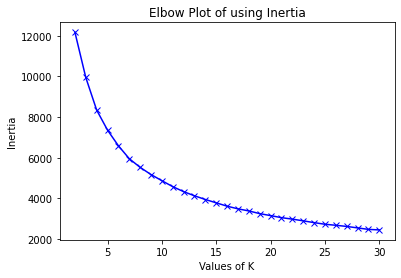

In [20]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Plot of using Inertia') 
plt.show() 

In [25]:
for key,val in mapping1.items():
    print(f"{str(key)} : {str(val)}")

2 : 12169.933381913197
3 : 9945.140035121187
4 : 8343.823100568185
5 : 7357.511665802441
6 : 6587.785333820168
7 : 5952.056610846239
8 : 5526.019308846688
9 : 5172.511550865334
10 : 4870.108970766039
11 : 4577.743998241438
12 : 4332.242749816072
13 : 4127.798686825346
14 : 3945.5254716230147
15 : 3781.897169036314
16 : 3617.532217146396
17 : 3486.781943932028
18 : 3383.1775445798303
19 : 3251.235101686829
20 : 3154.012532289499
21 : 3053.5033196074864
22 : 2980.8405057174277
23 : 2897.080840386088
24 : 2809.174925978839
25 : 2728.5403946099177
26 : 2678.125834092374
27 : 2621.8629901615295
28 : 2549.677307636462
29 : 2476.1701146800215
30 : 2450.22243728589


*With a range this large, it is hard to fathom where the elbow is. Even with the value for every k printed, the variance only drops for more than 650 until k=7.*

Create a silhouette plot for the results of K-Means, again with K varying from 2 to 30. What is the optimal number of clusters according to the silhouette method? Is this consistent with the output of the elbow plot?

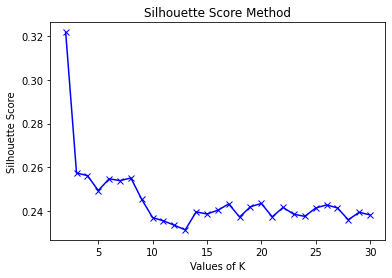

In [21]:
# answer goes here
plt.plot(K, silhouettes, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Silhouette Score') 
plt.title('Silhouette Score Method') 
plt.show() 

In [24]:
for key,val in mapping2.items():
    print(f"{str(key)} : {str(val)}")

2 : 0.321698387256946
3 : 0.25741183390008143
4 : 0.25627645148247274
5 : 0.24943685969712306
6 : 0.2547911487464837
7 : 0.25395115836691257
8 : 0.25515498354071847
9 : 0.24535843564213514
10 : 0.23708527983051714
11 : 0.2355635209628525
12 : 0.23360973608501848
13 : 0.2314465587428204
14 : 0.2396674029553428
15 : 0.23872759097087468
16 : 0.2404146051263566
17 : 0.24330260073928733
18 : 0.23734777608266405
19 : 0.2420438613461903
20 : 0.24352107494233965
21 : 0.23742598769488862
22 : 0.24169392667446488
23 : 0.2385769016224559
24 : 0.23763679734162912
25 : 0.2414620946968056
26 : 0.24284881503688227
27 : 0.24150725383115376
28 : 0.236068029204706
29 : 0.23949634301732797
30 : 0.238297069302096


*According to the silhouette method, the optimal number of clusters seem to be 2, which does not match the elbow plot's optimal suggestion.*